# How do machines understand language?

[![Natural Language Processing](http://img.youtube.com/vi/yGKTphqxR9Q/0.jpg)](http://www.youtube.com/watch?v=yGKTphqxR9Q)

This tutorial introduces the following key concepts in handling unstructured text data in Python for machine learning.  We will be covering the following concepts:

## Individual words analysis
* Removing Noise
* Tokenising
* Stemming 
* Lemmatisation
* Stop Words
* n-grams
* Bag of words

## Sentence structure analysis
The following concepts are also very useful for text analysis, so please feel free to do more research and see if you can implement these with the MBTI dataset
* Part of Speech Tagging
* Named Entity

Before we get started, lets get the data and the main library we will be using:

## [NLTK](http://www.nltk.org/)

NLTK - natural language toolkit - is a leading library for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning (more on this stuff below), wrappers for industrial-strength NLP libraries, and an active discussion forum.

Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike. NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project.

Natural Language Processing with Python provides a practical introduction to programming for language processing. Written by the creators of NLTK, it guides the reader through the fundamentals of writing Python programs, working with corpora, categorizing text, analyzing linguistic structure, and more. The book is being updated for Python 3 and NLTK 3. (The original Python 2 version is still available at http://nltk.org/.)

In [2]:
import nltk

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

As you go through this tutorial, you may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections.  Not to worry, this means you will need to download the [corpora](http://www.nltk.org/nltk_data/).  Follow these steps  below to get this! 

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

You should see this pop up box. Use it to navigate to the correct corpus. 

NOTE: the box might pop up in the backround, in which case you should use `alt + tab` to switch to the downloader window.
![NLTK-downloader](https://github.com/James-Leslie/Jupyter-Notebooks/blob/master/Image-repository/nltk_downloader.png?raw=TRUE) 

In [5]:
# or you can download the corpora directly, eg
# nltk.download('stopwords')

## Let's get the data and clean it up a bit

In [6]:
mbti = pd.read_csv('data/train.csv')

# List of mbti types 
type_labels = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 
               'ISTP', 'ISFP', 'INFP', 'INTP', 
               'ESTP', 'ESFP', 'ENFP', 'ENTP', 
               'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']

In [7]:
mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
mbti.info()

Lets have a look at how many of the different MBTI types we have data for.

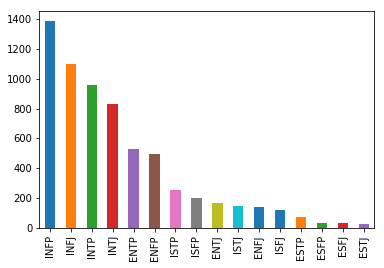

In [8]:
mbti['type'].value_counts().plot(kind = 'bar')
plt.show()

It looks like we have very few samples for the 'ES' types.  Maybe because they are out in the real-world, not sitting behind a computer screen! :)   
   
Lets increase the size of the dataset by converting each of the 50 posts into the `posts` column into its own row.

In [9]:
all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [10]:
# how many rows do we have now?
all_mbti.shape

(316548, 2)

In [17]:
all_mbti.loc[1137]['post']

"I do remember telling people that I'll send them their family members' body parts :tongue:  It's just that I don't think it's scary to joke about that. Either people are too sensitive, or I look..."

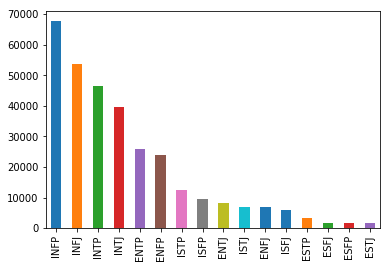

In [12]:
all_mbti['type'].value_counts().plot(kind = 'bar')
plt.show()

The proportions of the classes remains the same, but we now have a much larger number of samples for the 'ES' personality types.

## Removing Noise

In text analytics, removing unneccesary information is a key part of getting the data into a usable format.  Some techniques are standard, while your own data will require some creative thinking on your part.

For the MBTI data set we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation

**[Regular expressions](https://www.regular-expressions.info/)** can be very useful for extracting information from text.  If you feel brave, go teach yourself all about it... If not, just follow along.  This next step effectively removes all websites and replaces them with the text `'web-url'` 

In [14]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_mbti['post'] = all_mbti['post'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [15]:
all_mbti.head()

,type,post
0,INFJ,'url-web
1,INFJ,url-web
2,INFJ,enfp and intj moments url-web sportscenter n...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,url-web url-web On repeat for most of today.


**Seed of an idea...** There seem to be a lot of YouTube and other links embedded.  Maybe you can think of ways to collect even more information from these links?  How about page titles and names of Youtube videos?

### Remove punctuation

In [16]:
# first we make everything lower case to remove some noise from capitalisation
all_mbti['post'] = all_mbti['post'].str.lower()

In [17]:
import string
# these are the chars that count as punctuation. Let's remove the punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [19]:
all_mbti['post'] = all_mbti['post'].apply(remove_punctuation)

In [20]:
all_mbti['post'].iloc[268702]

'i hate april fools day angry  theres a site im regularly on and the admins are screwing everything up today for a laugh but i dont find it funny im actually quite freaked out about it '

## [Tokenising](http://www.nltk.org/howto/tokenize.html) 

A tokenizer divides text into a sequence of tokens, which roughly correspond to "words". (see the [Stanford Tokeniser](https://nlp.stanford.edu/software/tokenizer.shtml))  We will use tokenisers to clean up the data, making it ready for analysis.

In [21]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jlesl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
word_tokenize('A tokenizer divides text into a sequence of tokens, which roughly correspond to "words".')

['A',
 'tokenizer',
 'divides',
 'text',
 'into',
 'a',
 'sequence',
 'of',
 'tokens',
 ',',
 'which',
 'roughly',
 'correspond',
 'to',
 '``',
 'words',
 "''",
 '.']

In [23]:
# we will use the TreeBankWordTokenizer since it is MUCH quicker than the word_tokenise function
tokeniser = TreebankWordTokenizer()
all_mbti['tokens'] = all_mbti['post'].apply(tokeniser.tokenize)

In [24]:
all_mbti['tokens'].iloc[19]

['i',
 'just',
 'cherish',
 'the',
 'time',
 'of',
 'solitude',
 'bc',
 'i',
 'revel',
 'within',
 'my',
 'inner',
 'world',
 'more',
 'whereas',
 'most',
 'other',
 'time',
 'id',
 'be',
 'workin',
 'just',
 'enjoy',
 'the',
 'me',
 'time',
 'while',
 'you',
 'can',
 'dont',
 'worry',
 'people',
 'will',
 'always',
 'be',
 'around',
 'to']

## [Stemming](http://www.nltk.org/howto/stem.html)

Stemming is the process of transforming to the root word, that is, it uses an algorithm that removes
common word endings from English words, such as “ly,” “es,” “ed,” and “s.” 

For example, assuming for an analysis you may want to consider “carefully,” “cared,” “cares,” “caringly” as “care” instead of separate words. There are three widely used stemming algorithms, of which we will be using the `SnowballStemmer`:
* Porter
* Lancaster
* Snowball

In [25]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [26]:
words = 'caring cares cared caringly carefully'

In [27]:
# find the stem of each word in words
stemmer = SnowballStemmer('english')
for word in words.split():
    print(stemmer.stem(word))

care
care
care
care
care


In [28]:
def mbti_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]    

In [29]:
# stem all words in the mbti dataframe
all_mbti['stem'] = all_mbti['tokens'].apply(mbti_stemmer, args=(stemmer, ))

In [30]:
for i, t in enumerate(all_mbti.iloc[268702]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, all_mbti.iloc[268702]['stem'][i]))

i                    --> i         
hate                 --> hate      
april                --> april     
fools                --> fool      
day                  --> day       
angry                --> angri     
theres               --> there     
a                    --> a         
site                 --> site      
im                   --> im        
regularly            --> regular   
on                   --> on        
and                  --> and       
the                  --> the       
admins               --> admin     
are                  --> are       
screwing             --> screw     
everything           --> everyth   
up                   --> up        
today                --> today     
for                  --> for       
a                    --> a         
laugh                --> laugh     
but                  --> but       
i                    --> i         
dont                 --> dont      
find                 --> find      
it                   --> it 

## [Lemmatization](https://pythonprogramming.net/lemmatizing-nltk-tutorial/)

A very similar operation to stemming is called lemmatizing. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

Sometimes you will wind up with a very similar word, but other times you will wind up with a completely different word. Let's see some examples.

In [31]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("ran",'v'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jlesl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
cat
cactus
goose
rock
python
good
best
run
run


In [32]:
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [33]:
# lemmatize all words in dataframe
all_mbti['lemma'] = all_mbti['tokens'].apply(mbti_lemma, args=(lemmatizer, ))

In [34]:
for i, t in enumerate(all_mbti.iloc[268702]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, all_mbti.iloc[268702]['lemma'][i]))

i                    --> i         
hate                 --> hate      
april                --> april     
fools                --> fool      
day                  --> day       
angry                --> angry     
theres               --> there     
a                    --> a         
site                 --> site      
im                   --> im        
regularly            --> regularly 
on                   --> on        
and                  --> and       
the                  --> the       
admins               --> admins    
are                  --> are       
screwing             --> screwing  
everything           --> everything
up                   --> up        
today                --> today     
for                  --> for       
a                    --> a         
laugh                --> laugh     
but                  --> but       
i                    --> i         
dont                 --> dont      
find                 --> find      
it                   --> it 

## [Stop Words](http://johnlaudun.org/20130126-nltk-stopwords/)

Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.  See this [blog post](http://xpo6.com/list-of-english-stop-words/) for more information.

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
sorted(stopwords.words('english'))[0:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [38]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

Let's leave the stop words in for now so that we can test the following **Hypothesis**:
* Introverts tend to use the word **`I`** more than extroverts
* Conversely, Extroverts tend to favour the word **`you`**

In case you want to run the analysis again without stop words! Be warned, this can take long with the pandas apply function

In [39]:
# all_mbti['stem'] = all_mbti['tokens'].apply(remove_stop_words)

## Enough with the examples, why are we doing this already?

All that pre-processing allows us to finally do some analysis!  lets see what the 20 most common words in the whole text are. (Remember your first coding challenges?)

### [Bag of words](https://www.packtpub.com/mapt/book/application_development/9781849513609/7/ch07lvl1sec73/bag-of-words-feature-extraction)

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict. The Bag of Words model is the simplest method; it constructs a word presence feature set from all the words of an instance.

In [40]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [41]:
# here we create a set of dictionaries
# one for each of the MBTI types
personality = {}
for pp in type_labels:
    df = all_mbti.groupby('type')
    personality[pp] = {}
    for row in df.get_group(pp)['tokens']:
        personality[pp] = bag_of_words_count(row, personality[pp])       

In [42]:
# next we create a list of all of the unique words...
all_words = set()
for pp in type_labels:
    for word in personality[pp]:
        all_words.add(word)

In [43]:
# so that we can create a dictionary of bag of words for the whole dataset
personality['all'] = {}
for pp in type_labels:    
    for word in all_words:
        if word in personality[pp].keys():
            if word in personality['all']:
                personality['all'][word] += personality[pp][word]
            else:
                personality['all'][word] = personality[pp][word]

(array([  1.32661000e+05,   2.30000000e+01,   5.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   3.78411000e+04,   7.56812000e+04,
          1.13521300e+05,   1.51361400e+05,   1.89201500e+05,
          2.27041600e+05,   2.64881700e+05,   3.02721800e+05,
          3.40561900e+05,   3.78402000e+05]),
 <a list of 10 Patch objects>)

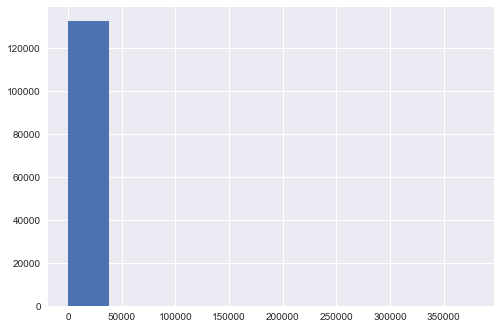

In [44]:
# lets have a look at the distrbution of words
plt.hist([v for v in personality['all'].values()])

There are a lot of words that only appear once! Let's remove them.

In [45]:
# how many words in total?
sum([v for v in personality['all'].values()])

8206375

In [46]:
# how many words appear only once?
len([v for v in personality['all'].values() if v == 1])

80839

In [47]:
# how many words appear more than 100 times?
# how many words of the total does that account for?
print (len([v for v in personality['all'].values() if v >= 100]))
print (sum([v for v in personality['all'].values() if v >= 100]))

4269
7581200


In [48]:
7581200/8206375

0.9238183729113038

Using words that appear more than 100 times seems much more useful!  And this accounts for 92% of all the words!

In [49]:
max_count = 100
word_index = [k for k, v in personality['all'].items() if v > max_count]

In [50]:
# now let's create one big data frame with the word counts by personality profile
hm = []
for p, p_bow in personality.items():
    df_bow = pd.DataFrame([(k, v) for k, v in p_bow.items() if k in word_index], columns=['Word', p])
    df_bow.set_index('Word', inplace=True)
    hm.append(df_bow)

# create one big data frame
df_bow = pd.concat(hm, axis=1)
df_bow.fillna(0, inplace=True)

In [51]:
# what are the top 10 words that appear most often?
df_bow.sort_values(by='all', ascending=False).head(10)

,ISTJ,ISFJ,INFJ,INTJ,ISTP,ISFP,INFP,INTP,ESTP,ESFP,ENFP,ENTP,ESTJ,ESFJ,ENFJ,ENTJ,all
i,8172.0,8044.0,67871,43864,13883.0,11148.0,87712,52115,3704.0,1696.0,31198.0,27403,1856.0,2168.0,8687.0,8881.0,378402
the,5143.0,4111.0,39663,30500,8893.0,6131.0,48008,35868,2191.0,937.0,16454.0,18994,1000.0,1200.0,5019.0,6135.0,230247
to,5106.0,4607.0,40231,28753,8725.0,6264.0,48996,33005,2254.0,972.0,16945.0,17852,1078.0,1223.0,5471.0,5889.0,227371
a,4033.0,3333.0,31932,22780,7124.0,4825.0,40376,26693,1868.0,796.0,13847.0,14728,841.0,986.0,3966.0,4748.0,182876
and,3827.0,3571.0,31628,21568,6540.0,5153.0,40710,24881,1905.0,834.0,15002.0,14236,943.0,988.0,4343.0,4564.0,180693
of,2976.0,2475.0,24312,17857,4962.0,3580.0,29576,21372,1300.0,557.0,10217.0,11335,650.0,779.0,3114.0,3499.0,138561
you,2734.0,2186.0,22221,16010,4696.0,3332.0,24971,17197,1396.0,651.0,10329.0,10882,653.0,639.0,3050.0,3815.0,124762
that,2207.0,2033.0,19445,14436,4055.0,2931.0,23445,16396,1063.0,550.0,8591.0,8949,521.0,615.0,2614.0,2907.0,110758
it,2290.0,2046.0,18376,13179,4244.0,2909.0,22537,15708,1065.0,434.0,8028.0,8265,469.0,490.0,2280.0,2604.0,104924
is,2186.0,1879.0,18237,14293,3704.0,2726.0,21068,15889,1121.0,482.0,7769.0,8904,554.0,565.0,2404.0,3000.0,104781


Thats not very helpful at all, is it! Its very difficult to extract insight from this data.  Lets see if we can use the $chi^2$ test to see whether Introverts favour the word **`I`**

In [52]:
intro_types = [p for p in type_labels if p[0] == 'I']

In [53]:
intro_types

['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP']

In [54]:
df_bow['I'] = df_bow[intro_types].sum(axis=1)

In [55]:
# convert to percentages
for col in ['I', 'all']:
    df_bow[col+'_perc'] = df_bow[col] / df_bow[col].sum()

Do you remember the chi2 test from the CINDY framework?  This looks at observed versus expected results and lets us know where the greatest differences from expected are.  The bigger the statistic, the greater the difference from expectation.  The formula is 

$$𝑐ℎ𝑖^2 = \sum{\frac{(𝑂𝑏𝑠𝑒𝑟𝑣𝑒𝑑 −𝑒𝑥𝑝𝑒𝑐𝑡𝑒𝑑)^2}{𝑒𝑥𝑝𝑒𝑐𝑡𝑒𝑑}}$$

In [56]:
df_bow['chi2'] = np.power((df_bow['I_perc'] - df_bow['all_perc']), 2) / df_bow['all_perc']

In [57]:
df_bow[['I_perc', 'all_perc', 'chi2']][df_bow['I_perc'] > df_bow['all_perc']].sort_values(by='chi2', ascending=False).head(10)

,I_perc,all_perc,chi2
urlweb,0.002971,0.002756,0.000017
infp,0.001318,0.001179,0.000016
infj,0.001173,0.001075,0.000009
infps,0.000491,0.000435,0.000007
infjs,0.000415,0.000366,0.000007
intp,0.000988,0.000918,0.000005
my,0.012716,0.012501,0.000004
i,0.050350,0.049933,0.000003
intps,0.000366,0.000332,0.000003
in,0.013036,0.012836,0.000003


And there it is! What can we conclude from this:
* I is the 8th most introverted word, by expectation
* Introverts tend to post more urls than extroverted people too! 
* The introverted types are more likely to be written by Introverts, maybe because people post about their own types?

In [58]:
df_bow[['I_perc', 'all_perc', 'chi2']][df_bow['I_perc'] < df_bow['all_perc']].sort_values(by='chi2', ascending=False).head(20)

,I_perc,all_perc,chi2
enfp,0.000479,0.000767,0.000108
entp,0.000397,0.000666,0.000108
entps,0.000119,0.000238,0.000060
enfps,0.000137,0.000241,0.000045
entj,0.000259,0.000380,0.000038
enfj,0.000288,0.000375,0.000020
estp,0.000231,0.000304,0.000017
entjs,0.000067,0.000111,0.000017
d,0.000378,0.000452,0.000012
enfjs,0.000076,0.000112,0.000012


# Now that we have done all of that, lets cheat!

Praise be to Python...

sklearn has a built in text feature extraction module called [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) that will literally do all that work in one line of code!


This function converts a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
vect = CountVectorizer()

In [61]:
vect.fit(all_mbti['post'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

## Tuning the vectorizer (discussion)

Thus far, we have been using the default parameters of [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [62]:
### show default parameters for CountVectorizer
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

- **stop_words:** string {'english'}, list, or None (default)
    - If 'english', a built-in stop word list for English is used.
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
    - If None, no stop words will be used.

In [63]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

- **ngram_range:** tuple (min_n, max_n), default=(1, 1)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted.
    - All values of n such that min_n <= n <= max_n will be used.

In [64]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [65]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

- **min_df:** float in range [0.0, 1.0] or int, default=1
    - When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [66]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

**Guidelines for tuning CountVectorizer:**

- Use your knowledge of the **problem** and the **text**, and your understanding of the **tuning parameters**, to help you decide what parameters to tune and how to tune them.
- **Experiment**, and let the data tell you the best approach!

In [67]:
betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))

In [68]:
betterVect.fit(all_mbti['post'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [69]:
len(betterVect.get_feature_names())

50426

## [ngrams](http://www.nltk.org/api/nltk.html?highlight=n%20grams#nltk.util.ngrams)

While individual words do carry meaning, it is often the case that combinations of words change meanings of sentences entirely.  For example, what difference does removing the `not` from this sentence make?

Natural Language processing is **not** easy!

ngrams are a method to extract combinations of words into features for model buildiing.  The `n` in ngrams specifies the number of tokens to include.  For example, a 2-gram returns all the consecutive pairs of words in a sentence

In [70]:
from nltk.util import ngrams

In [71]:
def word_grams(words, min_n=1, max_n=4):
    s = []
    for n in range(min_n, max_n):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

In [72]:
print (word_grams('one two three four'.split(' ')))

['one', 'two', 'three', 'four', 'one two', 'two three', 'three four', 'one two three', 'two three four']


In [73]:
[x for x in ngrams(all_mbti.iloc[268702]['tokens'], 2)]

[('i', 'hate'),
 ('hate', 'april'),
 ('april', 'fools'),
 ('fools', 'day'),
 ('day', 'angry'),
 ('angry', 'theres'),
 ('theres', 'a'),
 ('a', 'site'),
 ('site', 'im'),
 ('im', 'regularly'),
 ('regularly', 'on'),
 ('on', 'and'),
 ('and', 'the'),
 ('the', 'admins'),
 ('admins', 'are'),
 ('are', 'screwing'),
 ('screwing', 'everything'),
 ('everything', 'up'),
 ('up', 'today'),
 ('today', 'for'),
 ('for', 'a'),
 ('a', 'laugh'),
 ('laugh', 'but'),
 ('but', 'i'),
 ('i', 'dont'),
 ('dont', 'find'),
 ('find', 'it'),
 ('it', 'funny'),
 ('funny', 'im'),
 ('im', 'actually'),
 ('actually', 'quite'),
 ('quite', 'freaked'),
 ('freaked', 'out'),
 ('out', 'about'),
 ('about', 'it')]

In [74]:
[x for x in ngrams(all_mbti.iloc[268702]['tokens'], 3)]

[('i', 'hate', 'april'),
 ('hate', 'april', 'fools'),
 ('april', 'fools', 'day'),
 ('fools', 'day', 'angry'),
 ('day', 'angry', 'theres'),
 ('angry', 'theres', 'a'),
 ('theres', 'a', 'site'),
 ('a', 'site', 'im'),
 ('site', 'im', 'regularly'),
 ('im', 'regularly', 'on'),
 ('regularly', 'on', 'and'),
 ('on', 'and', 'the'),
 ('and', 'the', 'admins'),
 ('the', 'admins', 'are'),
 ('admins', 'are', 'screwing'),
 ('are', 'screwing', 'everything'),
 ('screwing', 'everything', 'up'),
 ('everything', 'up', 'today'),
 ('up', 'today', 'for'),
 ('today', 'for', 'a'),
 ('for', 'a', 'laugh'),
 ('a', 'laugh', 'but'),
 ('laugh', 'but', 'i'),
 ('but', 'i', 'dont'),
 ('i', 'dont', 'find'),
 ('dont', 'find', 'it'),
 ('find', 'it', 'funny'),
 ('it', 'funny', 'im'),
 ('funny', 'im', 'actually'),
 ('im', 'actually', 'quite'),
 ('actually', 'quite', 'freaked'),
 ('quite', 'freaked', 'out'),
 ('freaked', 'out', 'about'),
 ('out', 'about', 'it')]